# Purpose

CEO is not happy with new user sale volume

# Goal

It is your job to identify (using funnel analysis) problem and make suggestions to improve conversion rate

# Solution

Observations from cohort analysis

Each month the same number of people arrive at the home page

The number of people landing on the search page is dramatically reduced betweeen cohort[1,2] and cohort[3,4]

Mobile users are dramatically effected by user cohort --> the number of users who go from home page to search page on mobile devices changes dramatically depending on if they started in month 1/2 or month 3/4

gender has no effect on the drop in conversion

# Suggestions

New moblie users are being adversly effected by some change that took place between feb-march

they are landing on the home page but no longer landing (in the same proportion ) on the search page 

something is most likely wrong with the home page - search page transistion 

(maybe there is a brocken link)

(maybe the search bar has been moved or changed and is reducing user engagement)

(maybe mobile users are seeing an add they don't like)

# Exploration

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

input_data = '../../data/input/'
user = pd.read_csv(input_data + 'user_table.csv', parse_dates=['date'])
home = pd.read_csv(input_data + 'home_page_table.csv')
search = pd.read_csv(input_data + 'search_page_table.csv')
payment = pd.read_csv(input_data + 'payment_page_table.csv')
confirmation = pd.read_csv(input_data + 'payment_confirmation_table.csv')

print(user.shape,home.shape,search.shape,payment.shape,confirmation.shape)

(90400, 4) (90400, 2) (45200, 2) (6030, 2) (452, 2)


### Initial thoughts on data

90,400 users

90,400 made it to home page (100%)

45,200 made it to search page (50%)

6,030 made it to payment page (13%, 6.7%)

452 made it to confirmation page (7.5%, 1%, 0.5%)

## Checking for missing values / mismatched data types

In [2]:
ui = user.info()
hi = home.info()
si = search.info()
pi = payment.info()
ci = confirmation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null datetime64[ns]
device     90400 non-null object
sex        90400 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id    45200 non-null int64
page       45200 non-null object
dtypes: int64(1), object(1)
memory usage: 706.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
user_id    6030 non-null int64
page       6030 non-null object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB
<class 'pandas.c

All tables have no missing values, but there's no information on categorical information and the possible types they may take

## Checking categorical / object columns for null type categories

In [3]:
def get_value_counts(df):
    col_names = df.columns
    for col in col_names:
        print('{}'.format(df[col].value_counts()))
        
## you can enter any table here to look for missing type objects in the data frame of choice the results are summarized below      
get_value_counts(user[['sex']])

Male      45325
Female    45075
Name: sex, dtype: int64


results for each table are as follows
user - no missing objects
home - no missing objects
search - no missing objects
payment - no missing objects
confirmation - no missing objects

## Checking for duplicates

In [4]:
ud = user.drop_duplicates().shape
hd = home.drop_duplicates().shape
sd = search.drop_duplicates().shape
pd = payment.drop_duplicates().shape
cd = confirmation.drop_duplicates().shape
print('user duplicates {}\nhome duplicates{}\nsearch duplicates {}\npayment duplicates {}\nconfirmation duplicates{}\n'.format(ud,hd,sd,pd,cd))

user duplicates (90400, 4)
home duplicates(90400, 2)
search duplicates (45200, 2)
payment duplicates (6030, 2)
confirmation duplicates(452, 2)



There are no duplicates across tables
The data is already very clean

## Create large data frame to analyze cohorts

In [5]:
def merge_data(df1, df2, new_page_name):
    funnel = df1.merge(df2, on='user_id', how ='left')
    funnel[new_page_name] = funnel['page'] == new_page_name
    funnel[new_page_name] = funnel[[new_page_name]].astype(int)
    funnel = funnel.drop(columns = ['page'])
    return funnel

funnel = merge_data(user, home, 'home_page')
funnel = merge_data(funnel, search,'search_page')
funnel = merge_data(funnel, payment, 'payment_page')
funnel = merge_data(funnel, confirmation, 'payment_confirmation_page')

## check to see if you get the same number of 1 as you do payments
get_value_counts(funnel[['payment_page']])

0    84370
1     6030
Name: payment_page, dtype: int64


## Create Cohorts by time

In [10]:
# create cohorts by month
funnel['time_period'] = funnel['date'].apply(lambda x: x.strftime('%m-%d'))
funnel['cohort_group'] = funnel['date'].apply(lambda x: x.strftime('%m'))
get_value_counts(funnel[['cohort_group']])

02    22600
01    22600
04    22600
03    22600
Name: cohort_group, dtype: int64


In [62]:
# create groupbed cohort
def create_cohort(df, g_by = ['cohort_group']):
    grouped = df.sort_values(by = ['cohort_group'])
    grouped = grouped.groupby(g_by)
    cohorts = grouped.aggregate({'home_page':np.sum,'search_page' : np.sum, 'payment_page': np.sum, 'payment_confirmation_page':np.sum})
    return cohorts

In [63]:
cohorts = create_cohort(funnel)
cohorts = cohorts.transpose()
cohorts.head()

cohort_group,01,02,03,04
home_page,22600,22600,22600,22600
search_page,13554,13687,8879,9080
payment_page,2390,2412,631,597
payment_confirmation_page,189,173,44,46


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

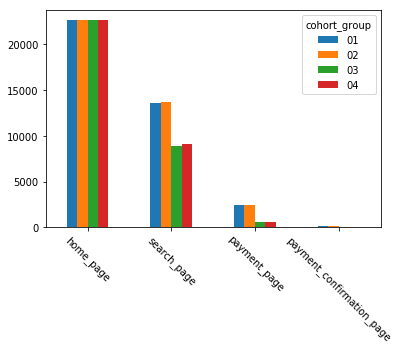

In [64]:
#plot counts by cohorts
cohorts.plot(kind = 'bar')
plt.xticks(rotation = -45)

the biggest change occurs between the home page and search page

### Create cohorts by device and time

In [68]:
device = create_cohort(funnel,g_by = ['cohort_group','device'])
device = device.transpose()
device.head()

cohort_group                   01             02             03         \
device                    Desktop Mobile Desktop Mobile Desktop Mobile   
home_page                   15050   7550   15050   7550   15050   7550   
search_page                  7529   6025    7632   6055    7370   1509   
payment_page                 1221   1169    1191   1221     296    335   
payment_confirmation_page      60    129      54    119      14     30   

cohort_group                   04         
device                    Desktop Mobile  
home_page                   15050   7550  
search_page                  7569   1511  
payment_page                  302    295  
payment_confirmation_page      22     24

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

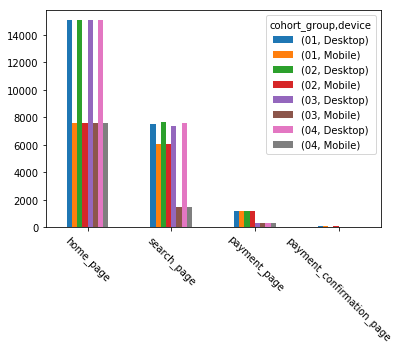

In [72]:
#plot counts by cohorts
device.plot(kind = 'bar')
plt.xticks(rotation = -45)

Desktop users were are largly indistinguishable between home and search page

however mobile users are dramatically effected between cohorts

### Cohorts by sex

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

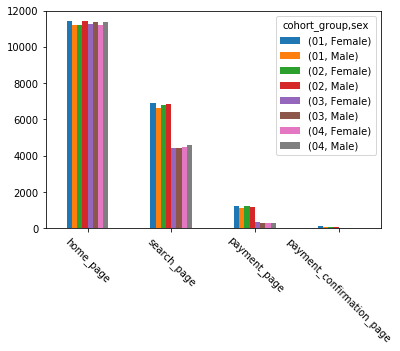

In [76]:
gender = create_cohort(funnel,g_by = ['cohort_group','sex'])
gender = gender.transpose()
#plot counts by cohorts
gender.plot(kind = 'bar')
plt.xticks(rotation = -45)

# Solution

Observations from cohort analysis

Each month the same number of people arrive at the home page

The number of people landing on the search page is dramatically reduced betweeen cohort[1,2] and cohort[3,4]

Mobile users are dramatically effected by user cohort --> the number of users who go from home page to search page on mobile devices changes dramatically depending on if they started in month 1/2 or month 3/4

gender has no effect on the drop in conversion

# Suggestions

New moblie users are being adversly effected by some change that took place between feb-march

they are landing on the home page but no longer landing (in the same proportion ) on the search page 

something is most likely wrong with the home page - search page transistion 

(maybe there is a brocken link)

(maybe the search bar has been moved or changed and is reducing user engagement)

(maybe mobile users are seeing an add they don't like)